In [20]:
# Libraries for numerical analysis, ploting and reading images
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import cv2
import os
from sklearn.cluster import k_means
from scipy.stats import sem

In [21]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.333, 0.333, 0.334])

In [3]:
# We read images to a dictionary as grayscale
# All files stores as png in the input folder
images = {}
for file in os.listdir("simulations/"):
    name = file.split(".")[0]
    extension = file.split(".")[1]
    if extension == "png":
        image = cv2.imread("simulations/"+file, cv2.IMREAD_COLOR)[107:107+522,354:354+522]
        images[name]=-np.array(-rgb2gray(image)+255, dtype=np.uint8)

In [4]:
def get_porosity(image, thresh=127, value = 255, kind=cv2.THRESH_BINARY):
    """This functions gets the porosity as defined as 
    
        1 - occupied pixels [%] = free pixels [%]
        
        and returns them for a greyscale image"""
    t, binary = cv2.threshold(image, thresh, value, kind)
    occupied = (binary==value).sum()
    free = (binary!=value).sum()
    return free / (free+occupied)

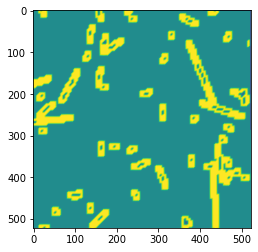

In [5]:
plt.imshow(images[name])

In [11]:
p_bin = []
for key in images:
    p_bin.append(get_porosity(images[key], thresh=127,kind=cv2.THRESH_BINARY))

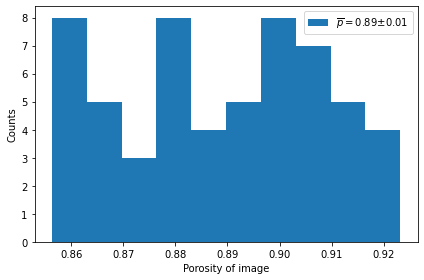

In [35]:
plt.hist(p_bin, label=r"$\overline{p}=$"+fr"{np.mean(p_bin):0.2f}$\pm${1.96*sem(p_bin):0.2f}")
plt.legend()
plt.xlabel("Porosity of image")
plt.ylabel("Counts")
plt.tight_layout()
plt.savefig("porosity.png", dpi=300)
plt.show()